In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
#linear models 
df=pd.read_csv('50.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.isna().sum() #it show how much data is none in col

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
df.nunique() #how many different values in every coloumn

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [7]:
df['State'].fillna(0)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
df.isna().sum()
df = pd.get_dummies(df, columns=['State'])
print(df)

    R&D Spend  Administration  Marketing Spend     Profit  State_California  \
0   165349.20       136897.80        471784.10  192261.83             False   
1   162597.70       151377.59        443898.53  191792.06              True   
2   153441.51       101145.55        407934.54  191050.39             False   
3   144372.41       118671.85        383199.62  182901.99             False   
4   142107.34        91391.77        366168.42  166187.94             False   
5   131876.90        99814.71        362861.36  156991.12             False   
6   134615.46       147198.87        127716.82  156122.51              True   
7   130298.13       145530.06        323876.68  155752.60             False   
8   120542.52       148718.95        311613.29  152211.77             False   
9   123334.88       108679.17        304981.62  149759.96              True   
10  101913.08       110594.11        229160.95  146121.95             False   
11  100671.96        91790.61        249744.55  1442

In [9]:
x=df.drop('Profit',axis=1.0)
y=df['Profit']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


#use the lass model
lasso=Lasso(alpha=1.0)

#fitting the trained data into lassp model
lasso.fit(x_train,y_train)

lasso.score(x_test,y_test)


0.8987342590380774

In [10]:
y_pred=lasso.predict(x_test)


mse=mean_squared_error(y_test,y_pred)
print(mse)

print(lasso.coef_[0])

82004194.36797845
0.8056221952471044


In [11]:
# ### Elastic net
# Elastic Net regression ek regularization technique hai jo Linear Regression ke liye use hoti hai. 
# Ye Ridge Regression aur Lasso Regression dono ka combination hai.
# Elastic Net ka purpose overfitting ko reduce karna aur models ko better generalize karna hota hai.

In [12]:
# Elastic Net ka Concept:
# 	1.	Ridge Regression:
# 	•	Penalizes large coefficients by adding the squared value of coefficients to the loss function.
# 	•	Useful jab saare features important hain.
# 	2.	Lasso Regression:
# 	•	Penalizes large coefficients by adding the absolute value of coefficients to the loss function.
# 	•	Features ko eliminate karne (zero kar dene) me madad karta hai.
# 	3.	Elastic Net:
# 	•	Ridge aur Lasso ka hybrid hai.
# 	•	Ye Ridge ke squared penalty aur Lasso ke absolute penalty dono ko combine karta hai.
# 	•	Ye un situations ke liye useful hai jahan correlated features hote hain.


In [13]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Sample dataset
data = {
    "X1": [1, 2, 3, 4, 5],
    "X2": [2, 4, 6, 8, 10], #kuch data values same hai dono me is liye jahan feature same hoga vahan elastic net use karenge
    "y": [1.1, 2.0, 2.9, 4.0, 5.1]
}

df = pd.DataFrame(data)

# Features aur target split karo
X = df[["X1", "X2"]]
y = df["y"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Elastic Net model
model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  # l1_ratio decides Lasso vs Ridge weight
model.fit(X_train, y_train)


# Predictions
y_pred = model.predict(X_test)

# Model ka evaluation
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.0024858156314566953


In [14]:
#multiElasticNet  jab output similar chahiye with different features
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import MultiTaskElasticNet
x= np.array([
    [16, 2, 80],
    [17, 3, 85],
    [16, 1, 70],
    [18, 4, 90],
    [17, 2, 60],
    [16, 3, 75],
    [18, 5, 95]
])
y = np.array([
    [85, 80],
    [90, 85],
    [75, 70],
    [95, 92],
    [70, 65],
    [80, 78],
    [98, 96]
])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

model=ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)



In [15]:
model.score(x_test,y_test)

0.8456480187174147

In [16]:
print(model.coef_[1])
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print(mse)

[1.49089128 0.85406619 0.78292923]
1.7644977631777805


In [17]:
#least angle path fllow karega
from sklearn.linear_model import Lars
df=pd.read_csv('results.csv')
df.head()
df.tail()


,Unnamed: 0,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
995,995,55,89,68,58,13,13,296,0,2
996,996,42,62,25,87,51,68,335,1,2
997,997,9,83,70,14,11,78,265,0,3
998,998,23,82,31,42,84,52,314,0,2
999,999,75,78,68,33,79,91,424,1,1


In [18]:

x=df.drop('Total', axis=1)
y=df['Total']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model=Lasso(alpha=0.1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print(mse)
print(model.coef_)

7.000339551283418e-05
[ 1.02067133e-07  9.99892526e-01  9.99875808e-01  9.99894373e-01
  9.99886703e-01  9.99871970e-01  9.99879578e-01  0.00000000e+00
 -0.00000000e+00]


In [19]:
lars=Lars(n_nonzero_coefs=4) #un features ko uthayega jinki sabse jyada jarurat hai or important hai
lars.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)

print(lars.coef_)
print(mse)


[0.00066514 0.10538273 0.         0.12397009 0.05922562 0.
 0.         0.         0.        ]
7.000339551283418e-05


In [20]:
df.describe()

,Unnamed: 0,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,51.645000,50.110000,49.440000,49.553000,49.03400,50.028000,299.810000,0.350000,1.856000
std,288.819436,29.471912,28.048505,28.921114,28.632447,28.76975,28.710268,71.865239,0.477208,0.904479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,103.000000,0.000000,0.000000
25%,249.750000,26.000000,26.000000,25.000000,25.750000,24.00000,26.000000,254.000000,0.000000,1.000000
50%,499.500000,53.000000,50.500000,50.000000,49.000000,49.00000,49.000000,296.000000,0.000000,2.000000
75%,749.250000,77.000000,75.000000,73.250000,74.000000,73.25000,75.000000,349.250000,1.000000,3.000000
max,999.000000,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000,505.000000,1.000000,3.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  1000 non-null   int64
 1   Hindi       1000 non-null   int64
 2   English     1000 non-null   int64
 3   Science     1000 non-null   int64
 4   Maths       1000 non-null   int64
 5   History     1000 non-null   int64
 6   Geograpgy   1000 non-null   int64
 7   Total       1000 non-null   int64
 8   Results     1000 non-null   int64
 9   Div         1000 non-null   int64
dtypes: int64(10)
memory usage: 78.3 KB


In [22]:
#larslasso ke andar hum important fetures select krte hai iske sath he lars ke madad se regularization bhi krte hai 
#jisse model overfitting se bhi bachta hai
from sklearn.linear_model import LassoLars
llars=LassoLars(alpha=0.1) #alpha regularization parameter hai
llars.fit(x_train,y_train)
y_pred=llars.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print(y_pred[0])
print(llars.coef_)
print(mse)
print(llars.score(x_train,y_train))
print(llars.score(x_test,y_test))
selected_indices = np.where(llars.coef_ != 0)[0]
print("Selected feature indices:", selected_indices) #konse features select kiye hai

232.0086980437576
[8.52280718e-08 9.99892418e-01 9.99875840e-01 9.99894382e-01
 9.99886720e-01 9.99871964e-01 9.99879572e-01 0.00000000e+00
 0.00000000e+00]
7.001669401499498e-05
0.9999999864955227
0.9999999862342253
Selected feature indices: [0 1 2 3 4 5 6]


In [23]:
df.head()

,Unnamed: 0,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
0,0,65,10,59,3,71,37,245,0,3
1,1,94,56,4,67,91,50,362,1,1
2,2,7,85,76,99,60,25,352,0,2
3,3,88,46,59,94,52,38,377,1,1
4,4,39,81,37,38,6,54,255,1,3


In [24]:
from sklearn.linear_model import OrthogonalMatchingPursuit
omp=OrthogonalMatchingPursuit(n_nonzero_coefs=6)
omp.fit(x_train,y_train)
y_pred=omp.predict(x_test)
mse=mse=mean_squared_error(y_test,y_pred)
print(mse)
print(omp.score(x_test,y_test))
print(omp.score(x_train,y_train))

835.6391624449448
0.8357074609721598
0.8533097724996159


In [25]:
df=pd.read_csv('stdd.csv')
df.head()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61
3,1.80,0.50,1.62,7.68,276.77,1.21,4.94
4,0.47,0.54,1.60,4.94,170.54,0.95,5.50


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WorkoutTime     2000 non-null   float64
 1   ReadingTime     2000 non-null   float64
 2   PhoneTime       2000 non-null   float64
 3   WorkHours       2000 non-null   float64
 4   CaffeineIntake  2000 non-null   float64
 5   RelaxationTime  2000 non-null   float64
 6   SleepTime       2000 non-null   float64
dtypes: float64(7)
memory usage: 109.5 KB


In [27]:
df.describe()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.495915,0.992785,2.985195,6.926945,147.493780,1.010955,4.884375
std,0.876639,0.577303,1.151776,1.723843,84.651139,0.582619,2.028892
min,0.010000,0.000000,1.000000,4.000000,0.020000,0.000000,0.150000
25%,0.710000,0.500000,1.990000,5.440000,75.980000,0.510000,3.840000
50%,1.520000,0.990000,2.965000,6.910000,146.010000,1.010000,4.600000
75%,2.250000,1.500000,3.960000,8.422500,218.902500,1.530000,5.470000
max,3.000000,2.000000,5.000000,10.000000,299.850000,2.000000,19.810000


In [28]:
##  
x=df.drop('SleepTime',axis=1).values
y=df['SleepTime'].values
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
# Bayesian Ridge model ko initialize karna
from sklearn.linear_model import BayesianRidge
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import BayesianRidge

# Load the dataset
data = pd.read_csv('stdd.csv')
print(data.head())
# Split the dataset into features (X) and target (y)
p=data.ffill()
X=p.drop(columns=['SleepTime','CaffeineIntake'])
y=p['SleepTime']

print(data.head())
print(x.head())
print(x.tail())

   WorkoutTime  ReadingTime  PhoneTime  WorkHours  CaffeineIntake  \
0         1.12         0.52       3.29       7.89          216.08   
1         2.85         0.49       4.22       5.03          206.18   
2         2.20         1.81       4.04       9.23           28.73   
3         1.80         0.50       1.62       7.68          276.77   
4         0.47         0.54       1.60       4.94          170.54   

   RelaxationTime  SleepTime  
0            0.75       3.45  
1            0.67       4.88  
2            0.35       3.61  
3            1.21       4.94  
4            0.95       5.50  
   WorkoutTime  ReadingTime  PhoneTime  WorkHours  CaffeineIntake  \
0         1.12         0.52       3.29       7.89          216.08   
1         2.85         0.49       4.22       5.03          206.18   
2         2.20         1.81       4.04       9.23           28.73   
3         1.80         0.50       1.62       7.68          276.77   
4         0.47         0.54       1.60       4.94     

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Bayesian Ridge Regression model
model = BayesianRidge()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)

s=model.score(X_test, y_test)
print(s)
p=model.score(X_train, y_train)
print(p)

In [ ]:

df=pd.read_csv('Student_marks.csv')
df.head()

In [ ]:
x=df.drop(['Marks','number_courses','pass'],axis=1)
y=df['pass']
print(x.tail())
print(y.head())

In [ ]:
df.describe()

In [ ]:
df.describe()

In [ ]:
# logistic regression use probability
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
#column of pass/fail if  marks>40 gives true else false
df['pass']= (df['Marks']>=20).astype(int)

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
LR=LogisticRegression()
LR.fit(x_train, y_train)
# make prediction 
y_pred=LR.predict(x_test)
# Splitting the data correctly

accuracy = accuracy_score(y_test, y_pred)

print(y_pred)
print(f"Accuracy: {accuracy}")


In [ ]:
##genearlized liinear model
##poisson 
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Sample Data
X = np.random.rand(50)
y = 2 * X + np.random.normal(0, 0.1, 50)  # Linear relationship with noise

# Add constant for intercept
X = sm.add_constant(X)

# Fit OLS regression model
model = sm.GLM(y, X).fit()
print(model.summary())

In [ ]:
#countiong 
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Dummy dataset
data = {
    'day_of_week': [1, 2, 3, 4, 5, 6, 7],  # Monday = 1, Sunday = 7
    'weather': [1, 0, 1, 0, 1, 0, 1],      # 1 = Sunny, 0 = Rainy
    'patient_count': [3, 2, 5, 4, 6, 2, 7] # Number of patients admitted
}

df = pd.DataFrame(data)

# Independent variables (add constant for the intercept)
X = sm.add_constant(df[['day_of_week', 'weather']])

# Dependent variable
y = df['patient_count']

# Fit Poisson Regression Model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Model summary
print(poisson_model.summary())

# Prediction for new data (Tuesday with sunny weather)
new_data = pd.DataFrame({'const': [1], 'day_of_week': [2], 'weather': [1]})
predicted_count = poisson_model.predict(new_data)
print(f"Predicted patient count for Tuesday (sunny): {predicted_count.iloc[0]:.2f}")

In [ ]:
df=pd.read_csv('stdd.csv')
df.info()

In [ ]:
df.describe()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

#last column is the last variablae
x=df.drop(['WorkHours'],axis=1)
y=df['WorkHours']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=80)
#scaling the data 

scale=StandardScaler()
#  fit_transform()
# 	•	Dono kaam karta hai: fit + transform
# 	•	Fit: Data ke basis par scaler ke liye statistics calculate karta hai (jaise mean aur standard deviation for StandardScaler).
# 	•	Transform: Calculated statistics ko use karke data ko scale karta hai.

x_train_scale=scale.fit_transform(x_train)
x_test_scale=scale.transform(x_test)

print(x_train_scale)


In [ ]:
from sklearn.metrics import accuracy_score
SGD=SGDRegressor(max_iter=1000,learning_rate='optimal',tol=0.0001)
SGD.fit(x_train_scale,y_train)
y_pred=SGD.predict(x_test_scale)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
## perceptron

df=pd.read_csv('stdd.csv')
df.info()
print(df.describe())


In [ ]:
df.head()


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

df['Work']= (df['WorkHours']>=6).astype(int)
X=df.drop(['WorkHours','Work'],axis=1)

print(df['Work'].unique())
print(df['Work'].value_counts())
y=df['Work']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


# Step 3: Scale the data (important for Perceptron)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the Perceptron model
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42,class_weight='balanced')
perceptron.fit(X_train_scaled, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = perceptron.predict(X_test_scaled)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Perceptron Model: {accuracy * 100:.2f}%")


## Passive aggressive classsifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
import matplotlib.pyplot as plt
df=pd.read_csv('results.csv')
df.head()

In [ ]:
df.describe()

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WorkoutTime     2000 non-null   float64
 1   ReadingTime     2000 non-null   float64
 2   PhoneTime       2000 non-null   float64
 3   WorkHours       2000 non-null   float64
 4   CaffeineIntake  2000 non-null   float64
 5   RelaxationTime  2000 non-null   float64
 6   SleepTime       2000 non-null   float64
dtypes: float64(7)
memory usage: 109.5 KB


In [171]:
x=df.drop(['Total'],axis=1)
y=df['Total']
print(y.head(),x.head())

0    245
1    362
2    352
3    377
4    255
Name: Total, dtype: int64    Unnamed: 0  Hindi  English  Science  Maths  History  Geograpgy  Results  \
0           0     65       10       59      3       71         37        0   
1           1     94       56        4     67       91         50        1   
2           2      7       85       76     99       60         25        0   
3           3     88       46       59     94       52         38        1   
4           4     39       81       37     38        6         54        1   

   Div  
0    3  
1    1  
2    2  
3    1  
4    3  


In [191]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#with scaling the data

scale=StandardScaler()
x_train_scale=scale.fit_transform(x_train)
x_test_scale=scale.transform(x_test)

#apply pac algo

pac= PassiveAggressiveClassifier(max_iter=1000, tol=1e-3,)  #no required learning rate

pac.fit(x_train_scale, y_train)

y_pred=pac.predict(x_test_scale)

acc=accuracy_score(y_test,y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 78.00%


In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#without scaling
#apply pac algo

pac=PassiveAggressiveClassifier(max_iter=1000, tol=1e-3,)  #no required learning rate

pac.fit(x_train, y_train)

y_pred=pac.predict(x_test)

acc=accuracy_score(y_test,y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")



Model Accuracy: 78.00%


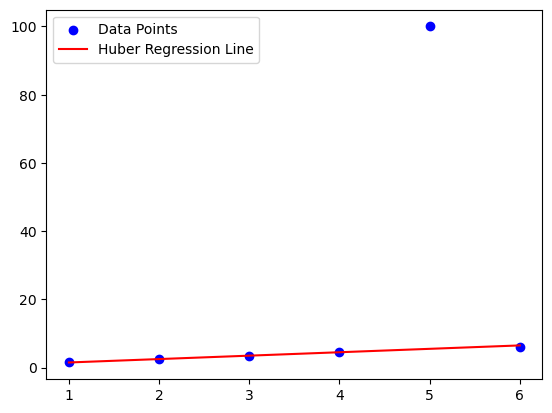

Predicted values: [1.50000109 2.50000032 3.49999956 4.4999988  5.49999804 6.49999727]


In [159]:
#robust regressor types

from sklearn.linear_model import HuberRegressor
import numpy as np
import matplotlib.pyplot as plt

# Example data (with an outlier)
X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([1.5, 2.5, 3.5, 4.5, 100, 6])  # Notice the outlier (100)

# Fit a Robust (Huber) Regressor model
model = HuberRegressor()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plotting
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Huber Regression Line')
plt.legend()
plt.show()

print(f"Predicted values: {y_pred}")

In [ ]:
from sklearn.linear_model import RANSACRegressor
import numpy as np
import matplotlib.pyplot as plt

# Example data (with an outlier)
X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([1.5, 2.5, 3.5, 4.5, 100, 6])  # Notice the outlier (100)

# Fit a Robust (RANSAC) Regressor model
ransac = RANSACRegressor()
ransac.fit(X, y)

# Predict
y_pred = ransac.predict(X)

# Plotting
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='RANSAC Regression Line')
plt.legend()
plt.show()

print(f"Predicted values: {y_pred}")

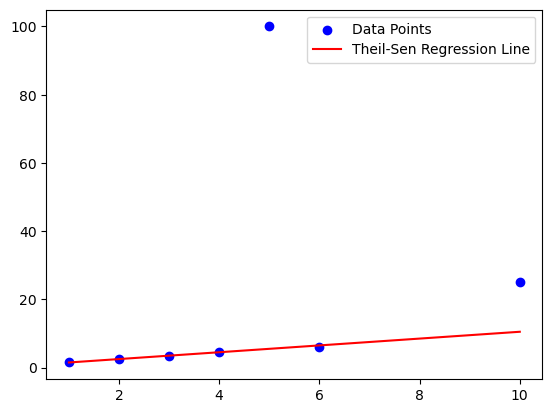

Predicted values: [ 1.49975335  2.50019388  3.5006344   4.50107493  5.50151546  6.50195599
 10.5037181 ]


In [161]:
from sklearn.linear_model import TheilSenRegressor
import numpy as np
import matplotlib.pyplot as plt

# Example data (with an outlier)
X = np.array([[1], [2], [3], [4], [5], [6],[10]])
y = np.array([1.5, 2.5, 3.5, 4.5, 100, 6, 25])  # Notice the outlier (100)

# Fit a Robust (Theil-Sen) Regressor model
model = TheilSenRegressor()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plotting
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Theil-Sen Regression Line')
plt.legend()
plt.show()

print(f"Predicted values: {y_pred}")

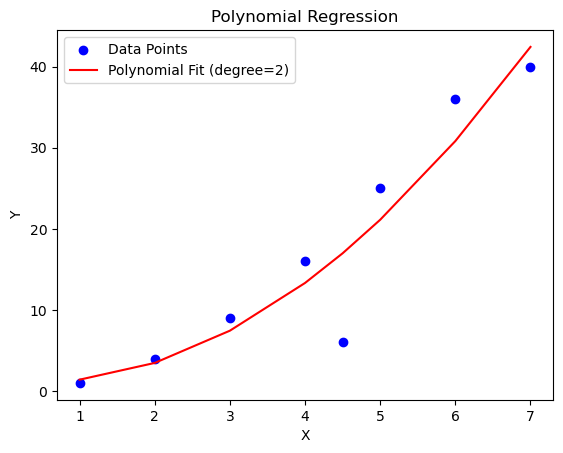

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Example data
x = np.array([1, 2, 3, 4,4.5, 5, 6,7]).reshape(-1, 1)  # Independent variable (Features)
y = np.array([1, 4, 9, 16, 6,25, 36,40])  # Dependent variable (Labels)

# Step 1: Create polynomial features
poly = PolynomialFeatures(degree=2)  # Degree 2 polynomial (you can increase this)
x_poly = poly.fit_transform(x)

# Step 2: Train the model using Polynomial Regression
model = LinearRegression()
model.fit(x_poly, y)

# Step 3: Predictions
y_pred = model.predict(x_poly)

# Step 4: Plotting
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label='Polynomial Fit (degree=2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Polynomial Regression')
plt.show()